# Bài tập lý thuyết 25/02/24
## Trần Nguyên Vũ - 21088201

In [2]:
# Import pandas
import pandas as pd

In [3]:
# Đọc dữ liệu
df = pd.read_csv('./data/loan_data.csv')

In [4]:
# Hiển thị 5 dòng đầu của dữ liệu
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

In [5]:
# Kích thước dữ liệu
print(df.shape)

(381, 13)


In [6]:
# Hiển thị thông tin các cột
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB
None


In [7]:
# Check missing values
print(df.isnull().sum())

# Xử lý null/mising values bằng cách điền giá trị trung bình
# Check if missing values is in a number column, then replace it with mean value
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace=True)
    else :
        df[column].fillna(df[column].mode()[0], inplace=True)

# Check missing values
print(df.isnull().sum())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\trann\AppData\Local\Temp\ipykernel_25324\3066101461.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\trann\AppData\Local\Temp\ipykernel_25324\3066101461.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [8]:
# Mô tả dữ liệu dùng các đại lượng thống kê mô tả
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       381.000000         381.000000  381.000000        381.000000   
mean       3579.845144        1277.275381  104.986877        340.864865   
std        1419.813818        2340.818114   28.358464         67.549811   
min         150.000000           0.000000    9.000000         12.000000   
25%        2600.000000           0.000000   90.000000        360.000000   
50%        3333.000000         983.000000  110.000000        360.000000   
75%        4288.000000        2016.000000  127.000000        360.000000   
max        9703.000000       33837.000000  150.000000        480.000000   

       Credit_History  
count      381.000000  
mean         0.837607  
std          0.354459  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


### Mô tả dữ liệu:
Dữ liệu đã cho chứa thông tin về các khoản vay với tổng cộng 381 dòng và 13 cột. 
Các thông số thống kê chính của dữ liệu số bao gồm:
- Thu nhập của người vay (ApplicantIncome): Trung bình là 3579.85, với độ lệch chuẩn là 1419.81. Giá trị nhỏ nhất và lớn nhất lần lượt là 150 và 9703.
- Thu nhập của người đồng vay (CoapplicantIncome): Trung bình là 1277.28, với độ lệch chuẩn là 2340.82. Giá trị nhỏ nhất là 0 và giá trị lớn nhất là 33837.
- Số tiền vay (LoanAmount): Trung bình là 104.99, với độ lệch chuẩn là 28.36. Giá trị nhỏ nhất là 9 và giá trị lớn nhất là 150.
- Thời hạn vay (Loan_Amount_Term): Trung bình là 340.86 tháng, với độ lệch chuẩn là 68.55. Giá trị nhỏ nhất là 12 tháng và giá trị lớn nhất là 480 tháng.
- Lịch sử tín dụng (Credit_History): Trung bình là 0.84, với độ lệch chuẩn là 0.37. Có hai giá trị duy nhất là 0 và 1, biểu thị cho việc khoản vay đã được chấp thuận hay chưa

Các thông số thống kê chính của dữ liệu chữ bao gồm:
- Gender (Giới tính): "Male" (Nam) là phần tử xuất hiện nhiều nhất với 291 lần xuất hiện.
- Married (Tình trạng hôn nhân): "Yes" (Đã kết hôn) xuất hiện nhiều nhất với 228 lần.
- Dependents (Người phụ thuộc): "0" người phụ thuộc là phần tử xuất hiện nhiều nhất với 234 lần.
- Education (Trình độ học vấn): "Graduate" (Tốt nghiệp đại học) xuất hiện nhiều nhất với 278 lần.
- Self_Employed (Tự làm chủ): "No" (Không tự làm chủ) xuất hiện nhiều nhất với 325 lần.
- Property_Area (Khu vực bất động sản): "Semiurban" (Bán đô thị) xuất hiện nhiều nhất với 149 lần.
- Loan_Status (Tình trạng khoản vay): "Y" (Khoản vay được chấp thuận) xuất hiện nhiều nhất với 271 lần.

## Phân tích cột dependents bằng bar chart

Dựa vào biểu đồ, ta có thể thấy:
- Giá trị "0", tức là những người vay không có người phụ thuộc, xuất hiện nhiều nhất. Điều này cho thấy đa số người vay trong bộ dữ liệu này không có người phụ thuộc.
- Tiếp theo, các giá trị "1", "2", và "3+" xuất hiện với tần suất giảm dần. Điều này cho thấy số lượng người vay có một hoặc hai người phụ thuộc là khá phổ biến, trong khi số lượng người vay có ba người phụ thuộc trở lên ("3+") là ít nhất.

<Axes: xlabel='Dependents'>

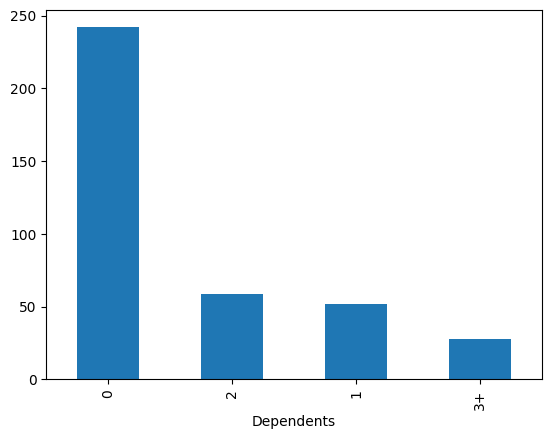

In [9]:
# Vẽ biểu đồ tần suất của Dependents bằng bar chart
import matplotlib.pyplot as plt
df['Dependents'].value_counts().plot(kind='bar')

## Phân tích cột CoapplicantIncome bằng histogram
- Biểu đồ phân phối thu nhập của người cùng vay (CoapplicantIncome) cho thấy một phân phối lệch phải mạnh mẽ, với phần lớn các giá trị tập trung ở khoảng thấp của trục thu nhập. Điều này cho thấy rằng đa số người cùng vay có thu nhập thấp, và chỉ một số ít có thu nhập cao.
- Cụ thể, biểu đồ thể hiện rõ ràng rằng số lượng đồng vay với thu nhập gần 0 là cao nhất, và số lượng này giảm dần khi thu nhập tăng lên. Sự giảm này nhanh chóng và đáng kể, đặc biệt ở khoảng thu nhập cao hơn, nơi số lượng đồng vay trở nên rất ít.

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

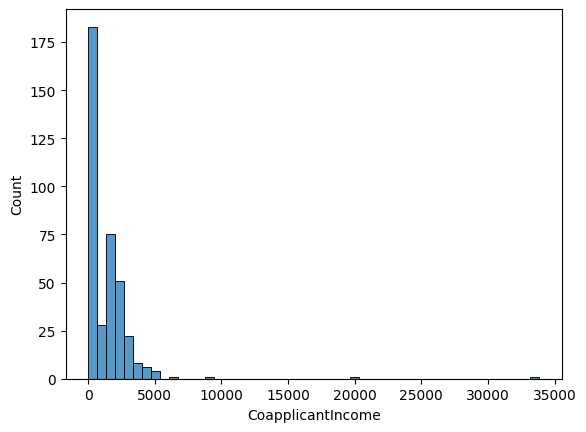

In [10]:
# Vẽ biểu đồ tần suất của CoapplicantIncome bằng histogram
import seaborn as sns
sns.histplot(df['CoapplicantIncome'], bins=50)

# Phân tích CoapplicantIncome bằng kdeplot 
Biểu đồ cho thấy một đỉnh cao rõ ràng gần 0, thể hiện rằng một lượng lớn đồng vay có thu nhập rất thấp hoặc không có thu nhập. Sau đỉnh cao đó, đường KDE giảm nhanh chóng và duy trì một mức độ mật độ thấp cho các giá trị thu nhập cao hơn, thể hiện rằng số lượng đồng vay giảm dần với thu nhập tăng lên. Điều này cũng xác nhận sự phân phối lệch phải mạnh mẽ của thu nhập đồng vay.

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

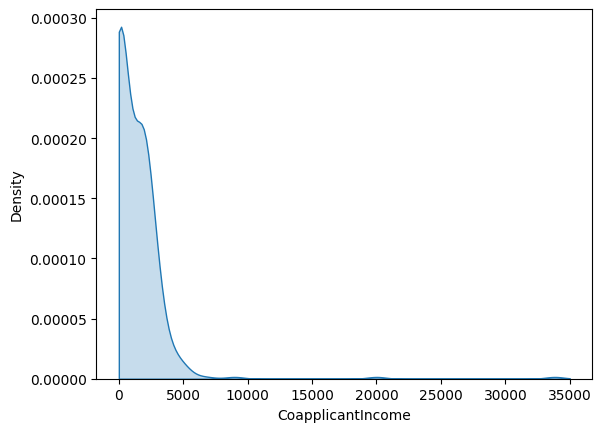

In [11]:
# Vẽ biểu đồ density của CoapplicantIncome bằng kdeplot
sns.kdeplot(df['CoapplicantIncome'], fill=True, clip=(0, 35000))

# Phân tích LoanAmount bằng kdeplot
- Biểu đồ cho thấy một đỉnh cao mở đầu từ khoảng thấp, thể hiện rằng số lượng lớn các khoản vay có giá trị ở mức thấp đến trung bình. Sự phân bố dần trở nên thưa thớt hơn ở các giá trị cao hơn, cho thấy số lượng khoản vay giảm dần khi số tiền vay tăng lên.
- Tương tự như CoapplicantIncome, phân bố của LoanAmount cũng cho thấy sự lệch phải, nghĩa là một số ít các khoản vay có giá trị rất cao so với phần lớn các khoản vay khác. Điều này phản ánh tính đa dạng trong nhu cầu vay vốn của người dân, từ những khoản vay nhỏ cho nhu cầu cá nhân hoặc kinh doanh nhỏ đến các khoản vay lớn hơn cho mua nhà, đầu tư lớn, v.v.

<Axes: xlabel='LoanAmount', ylabel='Density'>

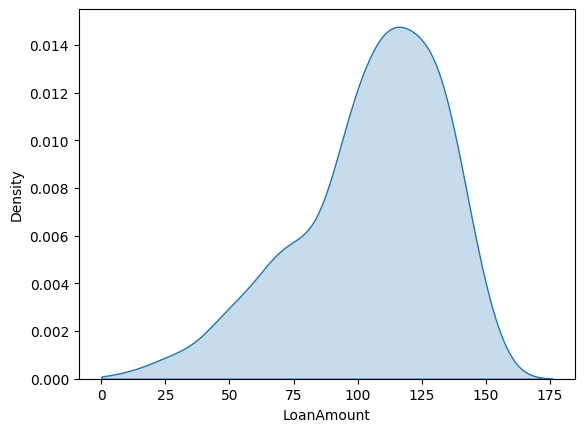

In [12]:
# Vẽ biểu đồ kdeplot của LoanAmount
sns.kdeplot(df['LoanAmount'], fill=True, clip=(0, 500))

<Axes: xlabel='LoanAmount'>

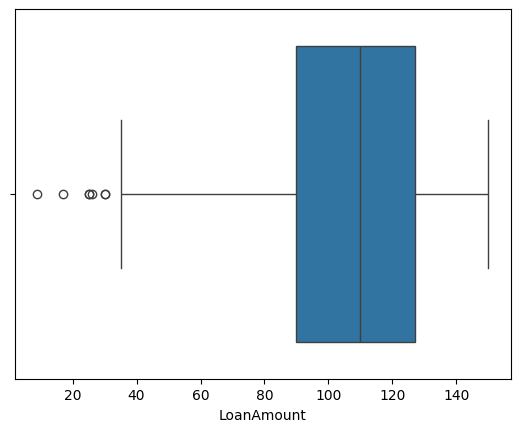

In [13]:
# Phân tích LoanAmount bằng boxplot
sns.boxplot(x='LoanAmount', data=df)

## Phân tích LoanAmount bằng boxplot
Biểu đồ boxplot của LoanAmount cho thấy rằng trong khi phần lớn các khoản vay có giá trị tập trung trong một khoảng tương đối nhỏ (từ Q1 đến Q3), cũng có một số lượng đáng kể các giá trị ngoại lệ ở phía cao của phân phối. Điều này phản ánh sự đa dạng trong số tiền vay, từ những khoản nhỏ đến các khoản lớn, và nhu cầu vay vốn đa dạng của người dâ

## Tạo heatmap

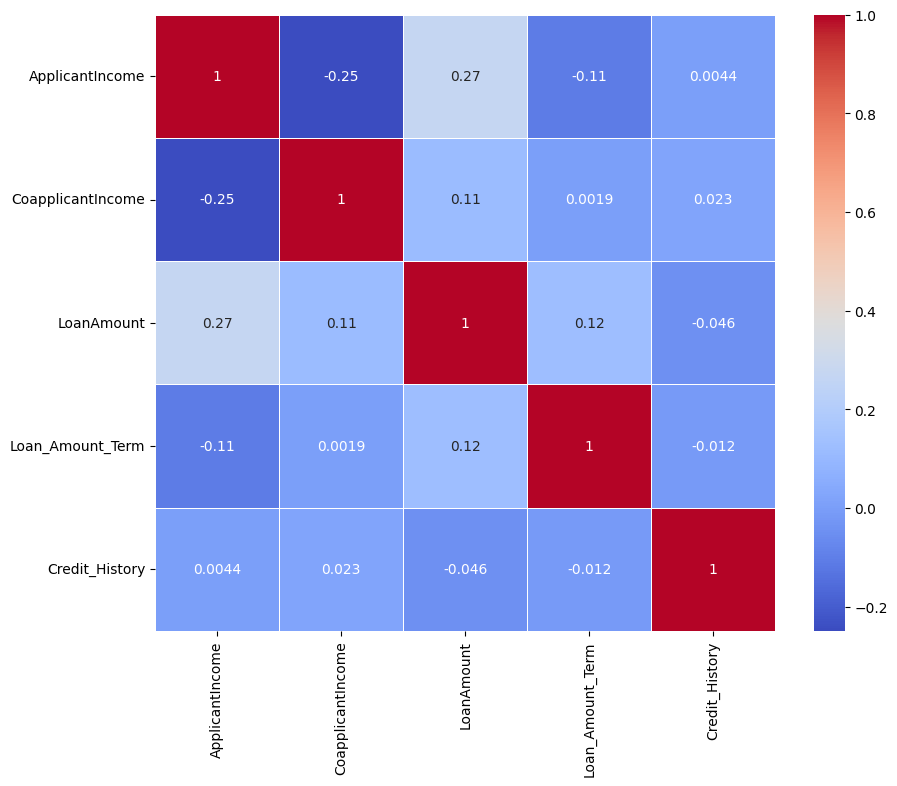

In [14]:
# Chọn các cột dữ liệu số
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

# Tính toán ma trận tương quan chỉ với các cột số
correlation_matrix = numeric_df.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## Chia data theo 80% phần trend, 20% phần... v

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

if 'Loan_Status' in df.columns:
    # Chuyển đổi cột mục tiêu sang dạng số nếu cần
    df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

    # Chọn các cột số và mã hóa các cột không phải số
    X = pd.get_dummies(df.drop('Loan_Status', axis=1))
    y = df['Loan_Status']

    # Chia dataset thành 80% train và 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Sử dụng thuật toán Random Forest Classifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)  # Huấn luyện mô hình

    # Dự đoán trên tập test
    y_pred = classifier.predict(X_test)

    # Đo độ chính xác
    accuracy = accuracy_score(y_test, y_pred)

    accuracy
else:
    raise ValueError("Cột 'Loan_Status' không tồn tại trong DataFrame.")

print("Độ chính xác của mô hình là: ", accuracy)

Độ chính xác của mô hình là:  1.0
